<a href="https://colab.research.google.com/github/bravoeight98/FFN_498R/blob/main/498r_48k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Libraries

Importing all necessary packages

In [1]:
#import package

!pip install ipython-autotime
%load_ext autotime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
time: 1.64 s (started: 2022-01-02 08:55:27 +00:00)


# Getting and preparing Datasets

Mount from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 23.9 s (started: 2022-01-02 08:56:12 +00:00)


In [3]:
# Reading from file 
fake = pd.read_csv('/content/drive/MyDrive/BanFakeNewsDataset/Fake-1K.csv')
true = pd.read_csv('/content/drive/MyDrive/BanFakeNewsDataset/Authentic-48K.csv')

time: 9.92 s (started: 2022-01-02 08:56:36 +00:00)


Show Info

In [4]:
print(true.shape)
print(true.info())
true.head()

(48678, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48678 entries, 0 to 48677
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   articleID  48678 non-null  int64 
 1   domain     48678 non-null  object
 2   date       48678 non-null  object
 3   category   48678 non-null  object
 4   headline   48678 non-null  object
 5   content    48678 non-null  object
 6   label      48678 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.6+ MB
None


,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


time: 64.9 ms (started: 2022-01-02 08:56:46 +00:00)


# Preprocessing Data

In [5]:
fake['Label'] = 1
true['Label'] = 0

time: 2.93 ms (started: 2022-01-02 08:57:02 +00:00)


In [6]:
data = pd.concat([true,fake],axis=0,ignore_index=True)
print(data.shape)
data.head()

(49977, 8)


,articleID,domain,date,category,headline,content,label,Label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1,0
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1,0
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1,0
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1,0
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1,0


time: 44.9 ms (started: 2022-01-02 08:57:02 +00:00)


In [7]:
data.describe()

,articleID,label,Label
count,49977.000000,49977.000000,49977.000000
mean,30045.527142,0.974008,0.025992
std,18317.000506,0.159113,0.159113
min,1.000000,0.000000,0.000000
25%,14168.000000,1.000000,0.000000
50%,30039.000000,1.000000,0.000000
75%,45898.000000,1.000000,0.000000
max,61780.000000,1.000000,1.000000


time: 41.9 ms (started: 2022-01-02 08:57:03 +00:00)


In [8]:
data['content']=data['headline']+data['content']
data=data.drop(['headline'], axis=1)

time: 125 ms (started: 2022-01-02 08:57:03 +00:00)


Chek if dataset is Balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


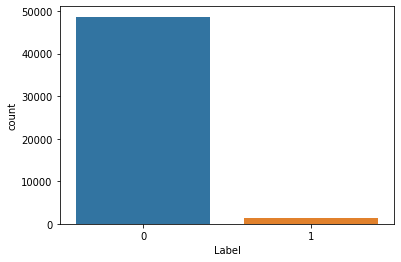

time: 184 ms (started: 2022-01-02 08:57:03 +00:00)


In [9]:
sns.countplot(data.Label)

Conclusion: Imbalanced Dataset

In [10]:
data.category.value_counts()

National         18807
International     7081
Sports            6580
Editorial         3504
Politics          3031
Miscellaneous     2872
Entertainment     2742
Finance           1226
Education         1145
Crime             1114
Lifestyle         1003
Technology         872
Name: category, dtype: int64

time: 18.6 ms (started: 2022-01-02 08:57:03 +00:00)


# Data Cleaning

Removing stop words in order to root words that are retaining in the data and fed into the models

In [11]:
#stop = stopwords.words('bangla')
stop = frozenset(["অবশ্য", "অনেক", "অনেকে", "অনেকেই", "অন্তত", "অথবা", "অথচ",
"অর্থাত",
"অন্য",
"আজ",
"আছে",
"আপনার",
"আপনি",
"আবার",
"আমরা",
"আমাকে",
"আমাদের",
"আমার",
"আমি",
"আরও",
"আর",
"আগে",
"আগেই",
"আই",
"অতএব",
"আগামী",
"অবধি",
"অনুযায়ী",
"আদ্যভাগে",
"এই",
"একই",
"একে",
"একটি",
"এখন",
"এখনও",
"এখানে",
"এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের"
"ওখানে",
"কত",
"কবে",
"করতে",
"কয়েক",
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",	
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন	বিষয়টি",
"ব্যবহার",
"ব্যাপারে",
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য", "জন্যওজে", "জে", "বেশ", "দেন", "তুলে", "ছিলেন", "চান", "চায়", "চেয়ে", "মোট", "যথেষ্ট", "টি"])
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

time: 4.14 s (started: 2022-01-02 08:57:12 +00:00)


#Bulding Model

Spliting datas into training set and test set

In [12]:
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(data['content'], y,test_size=0.33,random_state=53)

time: 23.6 ms (started: 2022-01-02 08:57:25 +00:00)


In [13]:
count_vectorizer = CountVectorizer(stop_words = frozenset(["অবশ্য", "অনেক", "অনেকে", "অনেকেই", "অন্তত", "অথবা", "অথচ",
"অর্থাত",
"অন্য",
"আজ",
"আছে",
"আপনার",
"আপনি",
"আবার",
"আমরা",
"আমাকে",
"আমাদের",
"আমার",
"আমি",
"আরও",
"আর",
"আগে",
"আগেই",
"আই",
"অতএব",
"আগামী",
"অবধি",
"অনুযায়ী",
"আদ্যভাগে",
"এই",
"একই",
"একে",
"একটি",
"এখন",
"এখনও",
"এখানে",
"এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের"
"ওখানে",
"কত",
"কবে",
"করতে",
"কয়েক",
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",	
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন	বিষয়টি",
"ব্যবহার",
"ব্যাপারে",
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য", "জন্যওজে", "জে", "বেশ", "দেন", "তুলে", "ছিলেন", "চান", "চায়", "চেয়ে", "মোট", "যথেষ্ট", "টি"]))

count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
print(count_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এব', 'এমনক', 'ওক', 'ওদ', 'ওয়', 'কট', 'কব', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'ধর', 'নঐ', 'নও', 'নত', 'পক', 'পষ', 'ফল', 'বদল', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'বয়', 'মত', 'মধ', 'মন', 'যওজ', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রওখ', 'রণ', 'রত', 'রপর', 'রভ', 'রয়', 'ষয়ট', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয়', 'হওয়', 'হচ', 'হব', 'হয়ত', 'হয়ন'] not in stop_words.
  % sorted(inconsistent)


(33484, 28134)
time: 11.4 s (started: 2022-01-02 08:57:26 +00:00)


#Trainig Model

##RNN

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

time: 2.43 s (started: 2022-01-02 08:57:42 +00:00)


In [15]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

time: 16.3 s (started: 2022-01-02 08:57:45 +00:00)


In [16]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

time: 15.8 s (started: 2022-01-02 08:58:01 +00:00)


In [17]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

time: 1.11 s (started: 2022-01-02 08:58:17 +00:00)


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [19]:
from sklearn.metrics import classification_report

time: 925 µs (started: 2022-01-02 08:58:20 +00:00)


In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

print(classification_report(y_test, binary_predictions, target_names = ['Fake','True']))

Epoch 1/10
1005/1005 [==============================] - 415s 405ms/step - loss: 0.1877 - accuracy: 0.9722 - val_loss: 0.1029 - val_accuracy: 0.9791
Epoch 2/10
1005/1005 [==============================] - 413s 411ms/step - loss: 0.1381 - accuracy: 0.9722 - val_loss: 0.1008 - val_accuracy: 0.9791
Epoch 3/10
1005/1005 [==============================] - 413s 410ms/step - loss: 0.0806 - accuracy: 0.9751 - val_loss: 0.0478 - val_accuracy: 0.9863
Epoch 4/10
1005/1005 [==============================] - 408s 406ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0391 - val_accuracy: 0.9866
Epoch 5/10
1005/1005 [==============================] - 409s 407ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.0430 - val_accuracy: 0.9878
Epoch 6/10
1005/1005 [==============================] - 409s 407ms/step - loss: 0.0136 - accuracy: 0.9972 - val_loss: 0.0439 - val_accuracy: 0.9872
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99     16101
   

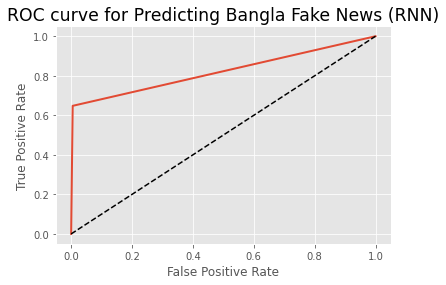

time: 177 ms (started: 2022-01-02 09:40:31 +00:00)


In [21]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (RNN)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [22]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, binary_predictions)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8214
time: 14.3 ms (started: 2022-01-02 09:40:31 +00:00)


In [23]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, binary_predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16019    82]
 [  138   254]]

True Positives(TP) =  16019

True Negatives(TN) =  254

False Positives(FP) =  82

False Negatives(FN) =  138
time: 19.3 ms (started: 2022-01-02 09:40:31 +00:00)


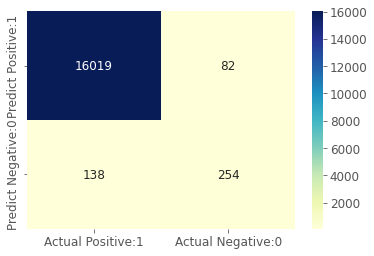

time: 271 ms (started: 2022-01-02 09:40:31 +00:00)


In [24]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)

print(classification_report(y_test, pred, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.99      0.34      0.51     16101
        True       0.03      0.79      0.05       392

    accuracy                           0.35     16493
   macro avg       0.51      0.57      0.28     16493
weighted avg       0.96      0.35      0.50     16493

time: 312 ms (started: 2022-01-02 09:40:31 +00:00)


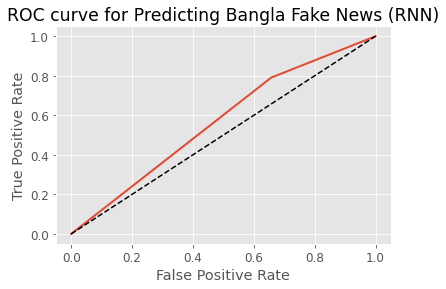

time: 195 ms (started: 2022-01-02 09:40:32 +00:00)


In [26]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (RNN)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [27]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5516 10585]
 [   82   310]]

True Positives(TP) =  5516

True Negatives(TN) =  310

False Positives(FP) =  10585

False Negatives(FN) =  82
time: 18.8 ms (started: 2022-01-02 09:40:32 +00:00)


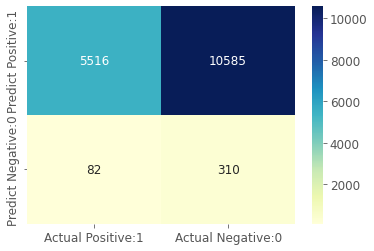

time: 250 ms (started: 2022-01-02 09:40:32 +00:00)


In [28]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Linear)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

time: 2.1 ms (started: 2022-01-02 09:40:32 +00:00)


In [30]:

svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction1 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction1, target_names = ['Fake','True']))


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99     16101
        True       0.63      0.63      0.63       392

    accuracy                           0.98     16493
   macro avg       0.81      0.81      0.81     16493
weighted avg       0.98      0.98      0.98     16493

time: 3min 39s (started: 2022-01-02 09:40:32 +00:00)


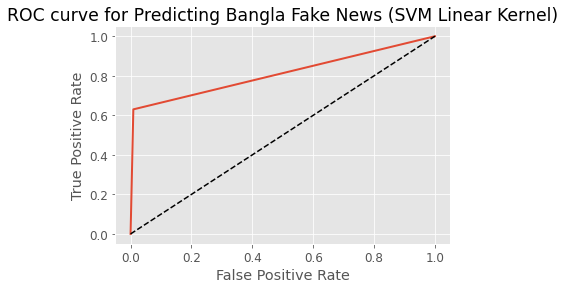

time: 183 ms (started: 2022-01-02 09:44:11 +00:00)


In [31]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Linear Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [32]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8105
time: 9.86 ms (started: 2022-01-02 09:44:12 +00:00)


In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15955   146]
 [  145   247]]

True Positives(TP) =  15955

True Negatives(TN) =  247

False Positives(FP) =  146

False Negatives(FN) =  145
time: 18.8 ms (started: 2022-01-02 09:44:12 +00:00)


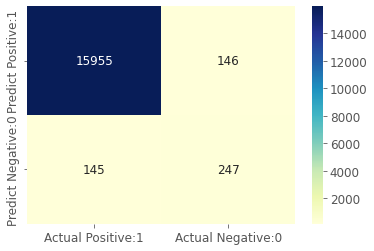

time: 262 ms (started: 2022-01-02 09:44:12 +00:00)


In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Polynomial)

In [35]:
svc_model1 = SVC(C=1, kernel='poly', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction2 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction2, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98     16101
        True       0.39      0.46      0.42       392

    accuracy                           0.97     16493
   macro avg       0.69      0.72      0.70     16493
weighted avg       0.97      0.97      0.97     16493

time: 11min 58s (started: 2022-01-02 09:44:12 +00:00)


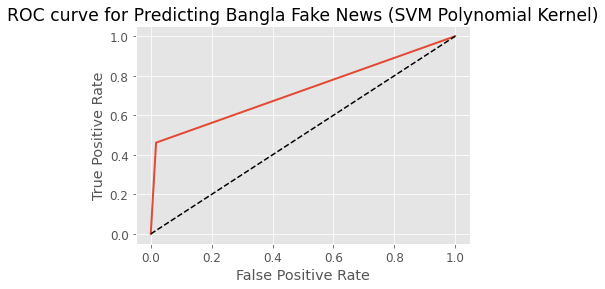

time: 191 ms (started: 2022-01-02 09:56:11 +00:00)


In [36]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Polynomial Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [37]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7221
time: 13.2 ms (started: 2022-01-02 09:56:11 +00:00)


In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction2)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15820   281]
 [  211   181]]

True Positives(TP) =  15820

True Negatives(TN) =  181

False Positives(FP) =  281

False Negatives(FN) =  211
time: 14.9 ms (started: 2022-01-02 09:56:11 +00:00)


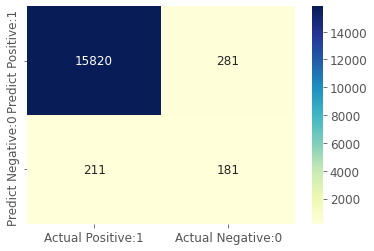

time: 262 ms (started: 2022-01-02 09:56:11 +00:00)


In [39]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (RBF)

In [40]:
svc_model1 = SVC(C=1, kernel='rbf', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction3 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction3, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.98      1.00      0.99     16101
        True       1.00      0.02      0.04       392

    accuracy                           0.98     16493
   macro avg       0.99      0.51      0.52     16493
weighted avg       0.98      0.98      0.97     16493

time: 1h 21min 49s (started: 2022-01-02 09:56:11 +00:00)


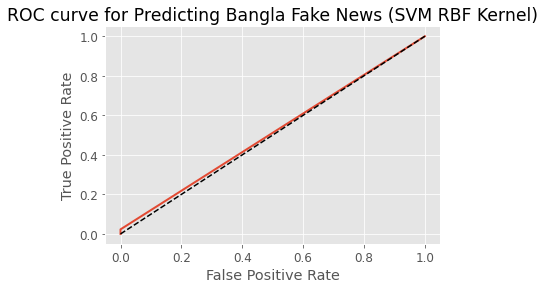

time: 185 ms (started: 2022-01-02 11:18:01 +00:00)


In [41]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction3)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM RBF Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [42]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction3)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5115
time: 10.5 ms (started: 2022-01-02 11:18:01 +00:00)


In [43]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction3)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16101     0]
 [  383     9]]

True Positives(TP) =  16101

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN) =  383
time: 15.4 ms (started: 2022-01-02 11:18:01 +00:00)


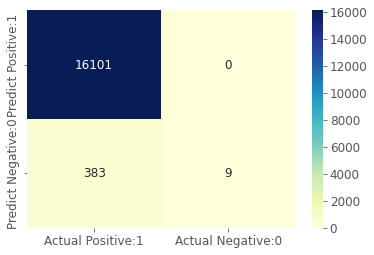

time: 273 ms (started: 2022-01-02 11:18:01 +00:00)


In [44]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Sigmoid)

In [45]:
svc_model1 = SVC(C=1, kernel='sigmoid', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction4 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction4, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98     16101
        True       0.09      0.10      0.09       392

    accuracy                           0.96     16493
   macro avg       0.53      0.54      0.54     16493
weighted avg       0.96      0.96      0.96     16493

time: 1min 3s (started: 2022-01-02 11:18:02 +00:00)


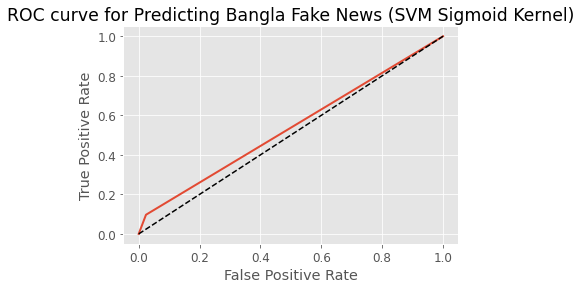

time: 186 ms (started: 2022-01-02 11:19:05 +00:00)


In [46]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Sigmoid Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [47]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction4)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5365
time: 11.3 ms (started: 2022-01-02 11:19:05 +00:00)


In [48]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction4)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15716   385]
 [  354    38]]

True Positives(TP) =  15716

True Negatives(TN) =  38

False Positives(FP) =  385

False Negatives(FN) =  354
time: 23.2 ms (started: 2022-01-02 11:19:05 +00:00)


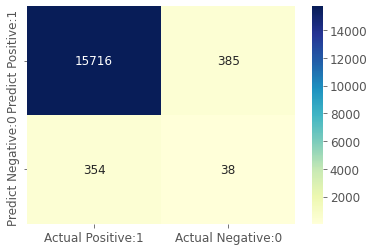

time: 257 ms (started: 2022-01-02 11:19:05 +00:00)


In [49]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##LSTM

In [50]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

time: 6.61 ms (started: 2022-01-02 11:19:06 +00:00)


In [51]:
max_features = 100000

time: 1.16 ms (started: 2022-01-02 11:19:06 +00:00)


In [52]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

time: 321 ms (started: 2022-01-02 11:19:06 +00:00)


In [53]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 1)

1047/1047 [==============================] - 825s 784ms/step - loss: 0.1363 - accuracy: 0.9723
time: 14min 25s (started: 2022-01-02 11:19:06 +00:00)


In [54]:
#pred = lstm_model.predict(X_test)
#pred = np.round(pred).astype(int)
predict_x=lstm_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
binary_predictions = []

for i in classes_x:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

print(classification_report(y_test, binary_predictions, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.98      1.00      0.99     16101
        True       0.00      0.00      0.00       392

    accuracy                           0.98     16493
   macro avg       0.49      0.50      0.49     16493
weighted avg       0.95      0.98      0.96     16493

time: 41.4 s (started: 2022-01-02 11:33:31 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


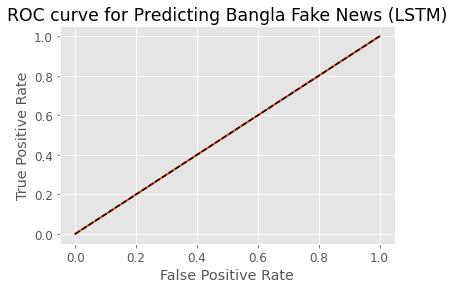

time: 185 ms (started: 2022-01-02 11:34:13 +00:00)


In [55]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, classes_x)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (LSTM)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [56]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classes_x)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16101     0]
 [  392     0]]

True Positives(TP) =  16101

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  392
time: 13.2 ms (started: 2022-01-02 11:34:13 +00:00)


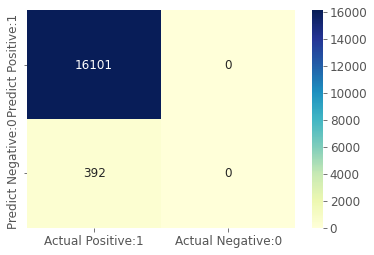

time: 257 ms (started: 2022-01-02 11:34:13 +00:00)


In [57]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')